In [5]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'eb71198a-552a-4370-9686-c21aefa6b0fa',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [6]:
type(data)

dict

In [7]:
type(data)
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#This normalizes the data and makes it all pretty in a dataframe

df= pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11798,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.978083e+07,1.978083e+07,False,NaN,1,NaN,NaN,None,2024-11-11T17:28:00.000Z,84467.295484,9.673049e+10,54.5981,0.064886,5.825841,24.570709,33.593138,45.218362,37.859712,1.670833e+12,58.2010,1.773813e+12,None,2024-11-11T17:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 19:30:34.440206
1,1027,Ethereum,ETH,ethereum,9518,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204238e+08,1.204238e+08,True,NaN,2,NaN,NaN,None,2024-11-11T17:28:00.000Z,3291.059757,5.219169e+10,34.6676,0.173432,2.407938,35.780612,32.797783,40.623874,21.330511,3.963219e+11,13.8053,3.963219e+11,None,2024-11-11T17:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 19:30:34.440206
2,825,Tether USDt,USDT,tether,103024,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.233864e+11,1.248354e+11,True,NaN,3,NaN,NaN,None,2024-11-11T17:28:00.000Z,1.001443,2.088162e+11,49.1671,0.037207,0.059676,0.207598,0.160754,0.154707,0.101501,1.235644e+11,4.3042,1.250155e+11,None,2024-11-11T17:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-11 19:30:34.440206
3,5426,Solana,SOL,solana,785,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.719321e+08,5.882240e+08,True,NaN,4,NaN,NaN,None,2024-11-11T17:28:00.000Z,218.452931,1.025904e+10,57.7692,-0.481046,3.434220,35.379391,48.710022,62.116085,46.874676,1.030950e+11,3.5875,1.284993e+11,None,2024-11-11T17:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 19:30:34.440206
4,1839,BNB,BNB,bnb,2275,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440993e+08,1.440993e+08,False,NaN,5,NaN,NaN,None,2024-11-11T17:28:00.000Z,633.765152,3.154785e+09,19.0643,0.857375,-0.953527,14.240856,9.811259,17.004736,21.236960,9.132512e+10,3.1812,9.132512e+10,None,2024-11-11T17:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 19:30:34.440206
5,74,Dogecoin,DOGE,dogecoin,1096,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.467488e+11,1.467488e+11,True,NaN,6,NaN,NaN,None,2024-11-11T17:29:00.000Z,0.321439,2.079215e+10,120.3876,0.475638,21.355565,104.171696,187.504470,215.753775,200.912167,4.717078e+10,1.6415,4.717078e+10,None,2024-11-11T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 19:30:34.440206
6,3408,USDC,USDC,usd-coin,22959,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.693918e+10,3.693918e+10,False,NaN,7,NaN,NaN,None,2024-11-11T17:28:00.000Z,0.999948,1.505213e+10,61.8209,0.025830,-0.000778,-0.014549,-0.002968,0.006456,-0.012790,3.693726e+10,1.2853,3.693726e+10,None,2024-11-11T17:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-11 19:30:34.440206
7,52,XRP,XRP,xrp,1417,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.686866e+10,9.998704e+10,False,NaN,8,NaN,NaN,None,2024-11-11T17:29:00.000Z,0.592734,3.656106e+09,8.4414,0.019412,-2.454366,16.617352,9.930706,5.562958,2.154308,3.370798e+10,1.1730,5.927338e+10,None,2024-11-11T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 19:30:34.440206
8,2010,Cardano,ADA,cardano,1342,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.50

In [9]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'eb71198a-552a-4370-9686-c21aefa6b0fa',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')



In [10]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner GG')
    sleep(60) #sleep for 1 minute
exit()

API Runner GG
API Runner GG
API Runner GG
API Runner GG
API Runner GG
API Runner GG
API Runner GG
API Runner GG
API Runner GG
API Runner GG
API Runner GG
API Runner GG


KeyboardInterrupt: 

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11798,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.978083e+07,1.978083e+07,False,NaN,1,NaN,NaN,None,2024-11-11T17:28:00.000Z,84467.295484,9.673049e+10,54.5981,0.064886,5.825841,24.570709,33.593138,45.218362,37.859712,1.670833e+12,58.2010,1.773813e+12,None,2024-11-11T17:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 19:30:34.440206,NaT
1,1027,Ethereum,ETH,ethereum,9518,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204238e+08,1.204238e+08,True,NaN,2,NaN,NaN,None,2024-11-11T17:28:00.000Z,3291.059757,5.219169e+10,34.6676,0.173432,2.407938,35.780612,32.797783,40.623874,21.330511,3.963219e+11,13.8053,3.963219e+11,None,2024-11-11T17:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 19:30:34.440206,NaT
2,825,Tether USDt,USDT,tether,103024,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.233864e+11,1.248354e+11,True,NaN,3,NaN,NaN,None,2024-11-11T17:28:00.000Z,1.001443,2.088162e+11,49.1671,0.037207,0.059676,0.207598,0.160754,0.154707,0.101501,1.235644e+11,4.3042,1.250155e+11,None,2024-11-11T17:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-11 19:30:34.440206,NaT
3,5426,Solana,SOL,solana,785,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.719321e+08,5.882240e+08,True,NaN,4,NaN,NaN,None,2024-11-11T17:28:00.000Z,218.452931,1.025904e+10,57.7692,-0.481046,3.434220,35.379391,48.710022,62.116085,46.874676,1.030950e+11,3.5875,1.284993e+11,None,2024-11-11T17:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 19:30:34.440206,NaT
4,1839,BNB,BNB,bnb,2275,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440993e+08,1.440993e+08,False,NaN,5,NaN,NaN,None,2024-11-11T17:28:00.000Z,633.765152,3.154785e+09,19.0643,0.857375,-0.953527,14.240856,9.811259,17.004736,21.236960,9.132512e+10,3.1812,9.132512e+10,None,2024-11-11T17:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 19:30:34.440206,NaT
5,74,Dogecoin,DOGE,dogecoin,1096,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.467488e+11,1.467488e+11,True,NaN,6,NaN,NaN,None,2024-11-11T17:29:00.000Z,0.321439,2.079215e+10,120.3876,0.475638,21.355565,104.171696,187.504470,215.753775,200.912167,4.717078e+10,1.6415,4.717078e+10,None,2024-11-11T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 19:30:34.440206,NaT
6,3408,USDC,USDC,usd-coin,22959,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.693918e+10,3.693918e+10,False,NaN,7,NaN,NaN,None,2024-11-11T17:28:00.000Z,0.999948,1.505213e+10,61.8209,0.025830,-0.000778,-0.014549,-0.002968,0.006456,-0.012790,3.693726e+10,1.2853,3.693726e+10,None,2024-11-11T17:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-11 19:30:34.440206,NaT
7,52,XRP,XRP,xrp,1417,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.686866e+10,9.998704e+10,False,NaN,8,NaN,NaN,None,2024-11-11T17:29:00.000Z,0.592734,3.656106e+09,8.4414,0.019412,-2.454366,16.617352,9.930706,5.562958,2.154308,3.370798e+10,1.1730,5.927338e+10,None,2024-11-11T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 19:30:34.440206,NaT
8,2010,Cardano,ADA,cardano,1342,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, rese

In [14]:
pd.set_option('display.float_format', lambda x:  '%.5f' % x)

In [16]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11798,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19780828.00000,19780828.00000,False,NaN,1,NaN,NaN,None,2024-11-11T17:28:00.000Z,84467.29548,96730489515.90916,54.59810,0.06489,5.82584,24.57071,33.59314,45.21836,37.85971,1670833043587.35913,58.20100,1773813205156.76001,None,2024-11-11T17:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 19:30:34.440206,NaT
1,1027,Ethereum,ETH,ethereum,9518,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120423803.88992,120423803.88992,True,NaN,2,NaN,NaN,None,2024-11-11T17:28:00.000Z,3291.05976,52191686450.22694,34.66760,0.17343,2.40794,35.78061,32.79778,40.62387,21.33051,396321934765.01892,13.80530,396321934765.02002,None,2024-11-11T17:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 19:30:34.440206,NaT
2,825,Tether USDt,USDT,tether,103024,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,123386401199.98550,124835400522.33641,True,NaN,3,NaN,NaN,None,2024-11-11T17:28:00.000Z,1.00144,208816159270.51526,49.16710,0.03721,0.05968,0.20760,0.16075,0.15471,0.10150,123564417727.52504,4.30420,125015507603.00999,None,2024-11-11T17:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-11 19:30:34.440206,NaT
3,5426,Solana,SOL,solana,785,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,471932113.27213,588224048.54375,True,NaN,4,NaN,NaN,None,2024-11-11T17:28:00.000Z,218.45293,10259039978.75835,57.76920,-0.48105,3.43422,35.37939,48.71002,62.11609,46.87468,103094953153.45738,3.58750,128499267210.03999,None,2024-11-11T17:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 19:30:34.440206,NaT
4,1839,BNB,BNB,bnb,2275,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144099304.05838,144099304.05838,False,NaN,5,NaN,NaN,None,2024-11-11T17:28:00.000Z,633.76515,3154785319.33627,19.06430,0.85737,-0.95353,14.24086,9.81126,17.00474,21.23696,91325117281.63092,3.18120,91325117281.63000,None,2024-11-11T17:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 19:30:34.440206,NaT
5,74,Dogecoin,DOGE,dogecoin,1096,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146748806383.70523,146748806383.70523,True,NaN,6,NaN,NaN,None,2024-11-11T17:29:00.000Z,0.32144,20792147261.01136,120.38760,0.47564,21.35556,104.17170,187.50447,215.75378,200.91217,47170775020.52200,1.64150,47170775020.52000,None,2024-11-11T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 19:30:34.440206,NaT
6,3408,USDC,USDC,usd-coin,22959,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36939180725.88076,36939180725.88076,False,NaN,7,NaN,NaN,None,2024-11-11T17:28:00.000Z,0.99995,15052129323.67159,61.82090,0.02583,-0.00078,-0.01455,-0.00297,0.00646,-0.01279,36937260683.95557,1.28530,36937260683.96000,None,2024-11-11T17:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-11 19:30:34.440206,NaT
7,52,XRP,XRP,xrp,1417,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56868662755.00000,99987041380.00000,False,NaN,8,NaN,NaN,None,2024-11-11T17:29:00.000Z,0.59273,3656106401.54308,8.44140,0.01941,-2.45437,16.61735,9.93071,5.56296,2.15431,33707976730.14612,1.17300,59273376754.

In [18]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d', 'quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.30370,5.81743,24.74889,33.91194,45.38993,37.95102
Ethereum,0.35394,2.49119,35.97992,33.10756,40.81867,21.43012
Tether USDt,0.02094,0.06137,0.20019,0.15140,0.15096,0.09332
Solana,-0.40816,3.27464,35.55920,48.84786,62.19160,46.92230
BNB,0.72778,-0.83244,14.49968,10.03693,17.18259,21.41232
Dogecoin,1.10589,20.36752,104.18270,189.10957,217.27575,202.40340
USDC,0.01130,0.00126,-0.01112,-0.00721,0.00569,-0.01447
XRP,0.25876,-2.36629,16.59840,10.06078,5.63451,2.24749
Cardano,-0.32598,-3.70772,83.06591,68.29231,67.64867,73.62586


In [20]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.30370
             quote.USD.percent_change_24h     5.81743
             quote.USD.percent_change_7d     24.74889
             quote.USD.percent_change_30d    33.91194
             quote.USD.percent_change_60d    45.38993
             quote.USD.percent_change_90d    37.95102
Ethereum     quote.USD.percent_change_1h      0.35394
             quote.USD.percent_change_24h     2.49119
             quote.USD.percent_change_7d     35.97992
             quote.USD.percent_change_30d    33.10756
             quote.USD.percent_change_60d    40.81867
             quote.USD.percent_change_90d    21.43012
Tether USDt  quote.USD.percent_change_1h      0.02094
             quote.USD.percent_change_24h     0.06137
             quote.USD.percent_change_7d      0.20019
             quote.USD.percent_change_30d     0.15140
             quote.USD.percent_change_60d     0.15096
             quote.USD.percent_change_90

In [22]:
type(df4)

pandas.core.series.Series

In [24]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.30370
            quote.USD.percent_change_24h   5.81743
            quote.USD.percent_change_7d   24.74889
            quote.USD.percent_change_30d  33.91194
            quote.USD.percent_change_60d  45.38993
            quote.USD.percent_change_90d  37.95102
Ethereum    quote.USD.percent_change_1h    0.35394
            quote.USD.percent_change_24h   2.49119
            quote.USD.percent_change_7d   35.97992
            quote.USD.percent_change_30d  33.10756
            quote.USD.percent_change_60d  40.81867
            quote.USD.percent_change_90d  21.43012
Tether USDt quote.USD.percent_change_1h    0.02094
            quote.USD.percent_change_24h   0.06137
            quote.USD.percent_change_7d    0.20019
            quote.USD.percent_change_30d   0.15140
            quote.USD.percent_change_60d   0.15096
            quote.USD.percent_change_90d   0.09332
Solana      quote.USD.percent_change_1h   -0.40816
            quote.USD.percent_change_24h   3.27464
            quote.USD.percent_change_7d   35.55920
            quote.USD.percent_change_30d  48.84786
            quote.USD.percent_change_60d  62.19160
            quote.USD.percent_change_90d  46.92230
BNB         quote.USD.percent_change_1h    0.72778
            quote.USD.percent_change_24h  -0.83244
            quote.USD.percent_change_7d   14.49968
            quote.USD.percent_change_30d  10.03693
            quote.USD.percent_change_60d  17.18259
            quote.USD.percent_change_90d  21.41232
Dogecoin    quote.USD.percent_change_1h    1.10589
            quote.USD.percent_change_24h  20.36752
            quote.USD.percent_change_7d  104.18270
            quote.USD.percent_change_30d 189.10957
            quote.USD.percent_change_60d 217.27575
            quote.USD.percent_change_90d 202.40340
USDC        quote.USD.percent_change_1h    0.01130
            quote.USD.percent_change_24h   0.00126
            quote.USD.percent_change_7d   -0.01112
            quote.USD.percent_change_30d  -0.00721
            quote.USD.percent_change_60d   0.00569
            quote.USD.percent_change_90d  -0.01447
XRP         quote.USD.percent_change_1h    0.25876
            quote.USD.percent_change_24h  -2.36629
            quote.USD.percent_change_7d   16.59840
            quote.USD.percent_change_30d  10.06078
            quote.USD.percent_change_60d   5.63451
            quote.USD.percent_change_90d   2.24749
Cardano     quote.USD.percent_change_1h   -0.32598
            quote.USD.percent_change_24h  -3.70772
            quote.USD.percent_change_7d   83.06591
            quote.USD.percent_change_30d  68.29231
            quote.USD.percent_change_60d  67.64867
            quote.USD.percent_change_90d  73.62586
Shiba Inu   quote.USD.percent_change_1h    0.59426
            quote.USD.percent_change_24h   2.51883
            quote.USD.percent_change_7d   65.46568
            quote.USD.percent_change_30d  54.98835
            quote.USD.percent_change_60d 108.84919
            quote.USD.percent_change_90d  99.40525
TRON        quote.USD.percent_change_1h    0.39936
            quote.USD.percent_change_24h   0.12391
            quote.USD.percent_change_7d    1.83308
            quote.USD.percent_change_30d   2.17365
            quote.USD.percent_change_60d   9.59346
            quote.USD.percent_change_90d  29.78409
Avalanche   quote.USD.percent_change_1h    3.47774
            quote.USD.percent_change_24h   4.26932
            quote.USD.percent_change_7d   48.32218
            quote.USD.percent_change_30d  17.56391
            quote.USD.percent_change_60d  43.70971
            quote.USD.percent_change_90d  59.08572
Toncoin     quote.USD.percent_change_1h    0.58212
            quote.USD.percent_change_24h  -0.09794
            quote.USD.percent_change_7d   13.83043
            quote.USD.percent_change_30d   2.99868
            quote.USD.percent_change_60d  -3.33916
            quo

In [26]:
type(df5)

pandas.core.frame.DataFrame

In [30]:
df6 = df5.reset_index()

In [34]:
df7 = df6.rename(columns={'level_1': 'percent change'})
df7

,name,percent change,values
0,Bitcoin,quote.USD.percent_change_1h,0.30370
1,Bitcoin,quote.USD.percent_change_24h,5.81743
2,Bitcoin,quote.USD.percent_change_7d,24.74889
3,Bitcoin,quote.USD.percent_change_30d,33.91194
4,Bitcoin,quote.USD.percent_change_60d,45.38993
5,Bitcoin,quote.USD.percent_change_90d,37.95102
6,Ethereum,quote.USD.percent_change_1h,0.35394
7,Ethereum,quote.USD.percent_change_24h,2.49119
8,Ethereum,quote.USD.percent_change_7d,35.97992
9,Ethereum,quote.USD.percent_change_30d,33.10756


In [50]:
df7['percent change'] = df7['percent change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7

,name,percent change,values
0,Bitcoin,1h,0.30370
1,Bitcoin,quote.USD.percent_change_24h,5.81743
2,Bitcoin,quote.USD.percent_change_7d,24.74889
3,Bitcoin,quote.USD.percent_change_30d,33.91194
4,Bitcoin,quote.USD.percent_change_60d,45.38993
5,Bitcoin,quote.USD.percent_change_90d,37.95102
6,Ethereum,1h,0.35394
7,Ethereum,quote.USD.percent_change_24h,2.49119
8,Ethereum,quote.USD.percent_change_7d,35.97992
9,Ethereum,quote.USD.percent_change_30d,33.10756


In [56]:
df7['percent change'] = df7['percent change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent change,values
0,Bitcoin,1h,0.30370
1,Bitcoin,24h,5.81743
2,Bitcoin,7d,24.74889
3,Bitcoin,30d,33.91194
4,Bitcoin,60d,45.38993
5,Bitcoin,90d,37.95102
6,Ethereum,1h,0.35394
7,Ethereum,24h,2.49119
8,Ethereum,7d,35.97992
9,Ethereum,30d,33.10756


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

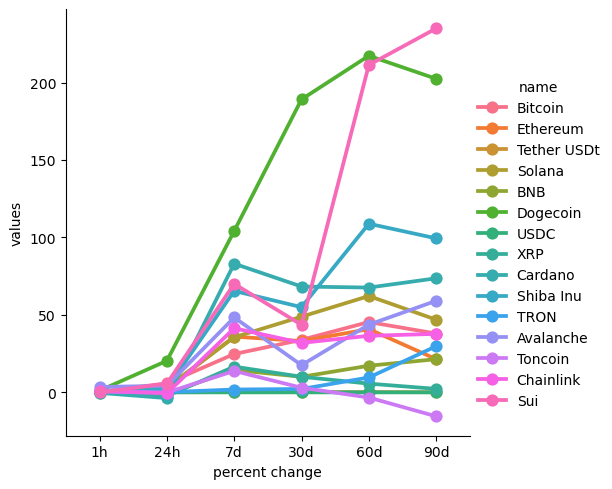

In [58]:
sns.catplot(x='percent change', y='values', hue='name', data=df7, kind='point')

In [96]:
 df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name=='Bitcoin'")
df10 = df10.iloc[1: , :]
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,84467.29548,2024-11-11 19:30:34.989715
0,Bitcoin,84412.24437,2024-11-11 19:31:35.499637
0,Bitcoin,84470.91687,2024-11-11 19:32:36.063319
0,Bitcoin,84428.84457,2024-11-11 19:33:36.564161
0,Bitcoin,84548.22349,2024-11-11 19:34:37.207811
0,Bitcoin,84680.48652,2024-11-11 19:35:37.849201
0,Bitcoin,84687.09482,2024-11-11 19:36:38.419414
0,Bitcoin,84696.43873,2024-11-11 19:37:38.927972
0,Bitcoin,84739.08509,2024-11-11 19:38:39.406567
0,Bitcoin,84804.56064,2024-11-11 19:39:39.876507


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

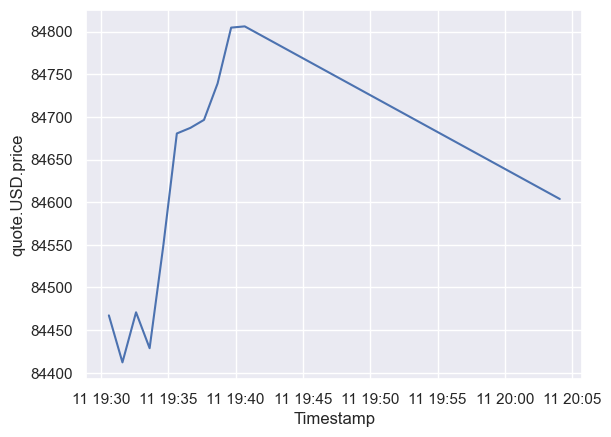

In [98]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)